<a href="https://colab.research.google.com/github/tugce999/audio-classification/blob/main/human_audio_classification_visualize_and_prepare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphaneler

In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import librosa
import librosa.display
import numpy as np
import math
import json
import random

In [ ]:
# ffmpeg modülü çalışmıyorsa alttaki kodu deneyebilirsiniz
#AudioSegment.ffmpeg = r"C:\Program Files\ffmpeg-5.0.1-essentials_build\bin\ffmpeg"

# WAV Dosyasına Çevirme

In [ ]:
from os.path import exists
from pydub import AudioSegment
# m4a formatında kaydedilen ses dosyalarını wav dosyalarına dönüştürmeye yarıyan fonksiyon
def convert_to_wav(path):
    """
    filename: wav dosyasına dönüştürülecek dosya yolunu verir
    """
    filename = path.split('.')[0] 
    formatname = path.split('.')[1]
    wav_filename = filename+'.wav'
    track = AudioSegment.from_file(path,  format= formatname)
    if not exists(wav_filename): # wav dosyası mevcutmu diye kontrol et!
        print("Wav file is being downloaded")
        file_handle = track.export(wav_filename, format='wav')
        MY_FILE = file_handle.name
    else:
        print("There is "+wav_filename)
    MY_FILE = os.getcwd()+"\\"+wav_filename
    return MY_FILE

In [ ]:

def convert_all(data_path):
    for dirpath, dirnames, filenames in os.walk(data_path):
        # people klasörünün altındaki kişilerin m4a formatındaki ses dosyalarını wav haline getirir.
        for f in filenames:
            # load audio file
            file_path = os.path.join(dirpath, f)
            if file_path.endswith('.wav'):
                print("There is a wav file")
                print(file_path)
            else :
                convert_to_wav(file_path)
                print("New wav file has created")
                print(file_path)

In [ ]:
DATASET_PATH = r"rawdata"
convert_all(DATASET_PATH)

There is a wav file
rawdata\osmankiral\osmankiral01.wav
There is a wav file
rawdata\SelimEminoglu\SelimEminoglu01.wav
There is a wav file
rawdata\TugceNurArdec\tugcenurardec01.wav
There is a wav file
rawdata\TugcePolat\tugcepolat.wav


# ÖN İŞLEME

## Örnek Wav Dosyası Seç

In [ ]:
random_file = "deneme.ax"
while random_file.split('.')[1] != 'wav':
    random_name = random.choice(os.listdir(os.getcwd()+"\predata"))
    random_file = random.choice(os.listdir(os.getcwd()+"\predata\\"+random_name))
AUDIO_FILE_PATH = os.getcwd()+"\predata\\"+random_name+"\\"+random_file
AUDIO_FILE_PATH

'C:\\Users\\faruk\\Desktop\\AudioClassifier\\predata\\faruk\\faruk1.wav'

## Ses Dosyasını İncele

In [ ]:
"""
# Pythonda bulunan IPython kütüphanesini kullanarak wav dosyasınıda oyanatabiliriz.
# Fakat burada biz daha fazla özellik çıkaracağımız için 'librosa' kütüphanesini kullanacağız.
import IPython.display as ipd
# Ses verisini oynatmayı sağlarlar.
AudioSegment.from_file(file=AUDIO_FILE_PATH, format="wav") # Yöntem 1
ipd.Audio(AUDIO_FILE_PATH)

"""

SAMPLE RATE IS :  22050


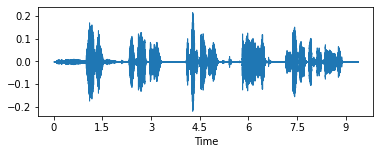

In [ ]:
plt.figure(figsize=(6,2))
# Librosa alınan wav dosyasını okuyup sinyal yani data ve sample rate değerlerini döner.
# data = 1D numpy array ve sample rate ile T (duration) değerlerinin çarpılması sonucu oluşan değer kadar veri sayısı barındırır.
data,sample_rate=librosa.load(AUDIO_FILE_PATH)
print("SAMPLE RATE IS : ",sample_rate)
librosa.display.waveshow(data,sr=sample_rate) # time-amplitude grafiği çıkartır.
SAMPLE_RATE = sample_rate # constant olarak baştan belirliyoruz.

[ 6.3159287e-09 -3.6083159e-09 -1.1700050e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


Text(0, 0.5, 'Amplitude')

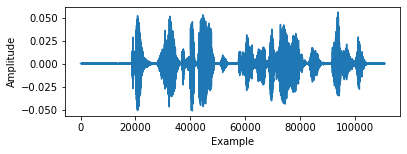

In [ ]:
librosa_audio_data,librosa_sample_rate=librosa.load(AUDIO_FILE_PATH)
print(librosa_audio_data)
librosa_audio_data.shape
# Original audio with 1 channel 
plt.figure(figsize=(6, 2))
plt.plot(librosa_audio_data)
plt.xlabel("Example")
plt.ylabel("Amplitude")
# Aşşağıdaki grafiktede yukarıdaki grafiğin aynısını bu sefer zaman bazlı değilde örnek bazlı versiyonunu görüyoruz.

## Ses Dosya Boyutlarını Eşitle 

In [ ]:
def get_wav_file_duration_in_seconds(file_path):
    audio = AudioSegment.from_file(file_path)
    audio.duration_seconds == (len(audio) / 1000.0)
    print("{} audio file is {} seconds".format(file_path,audio.duration_seconds))
    return audio.duration_seconds

In [ ]:
"""
# Bir wav dosyası için dosya bölünme olup olmadığını dene

file_name = r"C:\Users\faruk\Desktop\AudioClassifier\predata\bera\bera1.wav"
newAudio = AudioSegment.from_wav(file_name)
TRACK_DURATION = get_wav_file_duration_in_seconds(file_name)
TRACK_DURATION = TRACK_DURATION*1000
newAudio = newAudio[-4000:]
new_file_name = "deneme.wav" 
newAudio.export(new_file_name, format="wav")

"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 148-149: truncated \UXXXXXXXX escape (660671456.py, line 1)

In [ ]:
# Tüm ses dosyalarının sürelerini aynı olmalarını sağlamak gerekiyor.
# Eğer aynı boyutta olmazlarsa modelin eğitmesi açısından problem oluşturuyor.
# Verileri X saniyeye göre ayarla 10 saniyeden daha kısa ses kayıtlarını kabul etme
def preprocess_lengt_of_audio_files():
    PATH = r'augmenteddata\\'
    SAVE_PATH = r'data\\augmentpeople\\'
    from pydub import AudioSegment
    for dirpath, dirnames, filenames in os.walk(PATH):

        person_file_count = 0
        for f in filenames:
            # load audio file
            file_path = os.path.join(dirpath, f)
            if file_path.endswith('.wav'):

                person_name = str(file_path).split('\\')[2]
                print(person_name)
                newAudio = AudioSegment.from_wav(file_path)

                if not os.path.exists(SAVE_PATH+person_name):
                    print("yok")
                    os.makedirs(SAVE_PATH+person_name)


                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                signal_length = signal.shape[0]
                # Samples per segment burada belirle
                TRACK_DURATION = get_wav_file_duration_in_seconds(file_path)
                TRACK_DURATION_MILLI_SECONDS = TRACK_DURATION*1000
                part_count = math.ceil(TRACK_DURATION / 10)
                print(part_count," adet bölüme ayrılacaktır.")

                for i in range(part_count):

                    new_file_name = r"{base_dir}{person_name}\\{file_name}{filenumber}.wav".format(base_dir=SAVE_PATH,person_name=person_name,
                                                                                                 file_name=person_name,filenumber=person_file_count)
                    person_file_count+=1
                    print(new_file_name)
                    FILE_MILLI_SECOND = 30000 # millisecond cinsinden 30 saniye
                    second = i * FILE_MILLI_SECOND 

                    if second+FILE_MILLI_SECOND <= TRACK_DURATION_MILLI_SECONDS:

                        newAudioToSave = newAudio[second:second+FILE_MILLI_SECOND]
                        newAudioToSave.export(new_file_name, format="wav")
                        new_file_track_duration = get_wav_file_duration_in_seconds(new_file_name)

                    else:
                        newAudioToSave = newAudio[-FILE_MILLI_SECOND:]
                        newAudioToSave.export(new_file_name, format="wav")
                        new_file_track_duration = get_wav_file_duration_in_seconds(new_file_name)



In [ ]:
preprocess_lengt_of_audio_files()

osman
augmenteddata\\osman\osmandusukdesibel.wav audio file is 59.94 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\osman\\osman0.wav
data\\augmentpeople\\osman\\osman0.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman1.wav
data\\augmentpeople\\osman\\osman1.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman2.wav
data\\augmentpeople\\osman\\osman2.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman3.wav
data\\augmentpeople\\osman\\osman3.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman4.wav
data\\augmentpeople\\osman\\osman4.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman5.wav
data\\augmentpeople\\osman\\osman5.wav audio file is 30.0 seconds
osman
augmenteddata\\osman\osmangurultuazaltma.wav audio file is 59.94 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\osman\\osman6.wav
data\\augmentpeople\\osman\\osman6.wav audio file is 30.0 seconds
data\\augmentpeople\\osman\\osman7.wav
data\\augmen

augmenteddata\\selim\selimkalpcihazi.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\selim\\selim12.wav
data\\augmentpeople\\selim\\selim12.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim13.wav
data\\augmentpeople\\selim\\selim13.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim14.wav
data\\augmentpeople\\selim\\selim14.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim15.wav
data\\augmentpeople\\selim\\selim15.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim16.wav
data\\augmentpeople\\selim\\selim16.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim17.wav
data\\augmentpeople\\selim\\selim17.wav audio file is 30.0 seconds
selim
augmenteddata\\selim\selimkus.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\selim\\selim18.wav
data\\augmentpeople\\selim\\selim18.wav audio file is 30.0 seconds
data\\augmentpeople\\selim\\selim19.wav
data\\augmentpeopl

augmenteddata\\tuğçenur\tugcenurkus.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\tuğçenur\\tuğçenur18.wav
data\\augmentpeople\\tuğçenur\\tuğçenur18.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçenur\\tuğçenur19.wav
data\\augmentpeople\\tuğçenur\\tuğçenur19.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçenur\\tuğçenur20.wav
data\\augmentpeople\\tuğçenur\\tuğçenur20.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçenur\\tuğçenur21.wav
data\\augmentpeople\\tuğçenur\\tuğçenur21.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçenur\\tuğçenur22.wav
data\\augmentpeople\\tuğçenur\\tuğçenur22.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçenur\\tuğçenur23.wav
data\\augmentpeople\\tuğçenur\\tuğçenur23.wav audio file is 30.0 seconds
tuğçenur
augmenteddata\\tuğçenur\tugcenurokul.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\tuğçenur\\tuğçenur24.wav
data\\augmentpeople\\tuğçenur\\tuğçenu

augmenteddata\\tuğçepolat\tugcepolatkus.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\tuğçepolat\\tuğçepolat18.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat18.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçepolat\\tuğçepolat19.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat19.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçepolat\\tuğçepolat20.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat20.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçepolat\\tuğçepolat21.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat21.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçepolat\\tuğçepolat22.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat22.wav audio file is 30.0 seconds
data\\augmentpeople\\tuğçepolat\\tuğçepolat23.wav
data\\augmentpeople\\tuğçepolat\\tuğçepolat23.wav audio file is 30.0 seconds
tuğçepolat
augmenteddata\\tuğçepolat\tugcepolatokul.wav audio file is 60.0 seconds
6  adet bölüme ayrılacaktır.
data\\augmentpeople\\tuğçe

# Özellik Çıkarma (Feature Extraction)

In [ ]:
librosa_audio_data,librosa_sample_rate=librosa.load(AUDIO_FILE_PATH)
data = librosa_audio_data

In [ ]:
# FFT -> power spectrum
# Fourier transform uygula
fft = np.fft.fft(data)
# magnitude değerlerini alabilmek için fft sonucu elde edilen karmaşık sayıların absolute değerlerini al.
spectrum = np.abs(fft)

In [ ]:
# frekans değerini oluştur
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

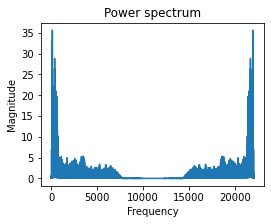

In [ ]:
# plot spectrum
plt.figure(figsize=(4,3))
plt.plot(f, spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# Yukarıdaki grafikten anlaşılacağı üzere sağ taraf sol tarafın yansıması şeklindedir.
# Bu nedenle veriyi işlerken kullanacağımız spectrum değerleri sol taraftaki kısım olacaktır.
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
spectrum = left_spectrum
f = left_f

Text(0.5, 1.0, 'Power spectrum')

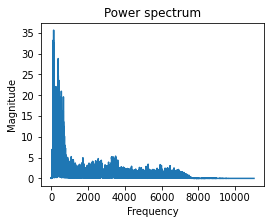

In [ ]:
# plot spectrum
plt.figure(figsize=(4,3))
plt.plot(f, spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# STFT -> spectrogram
hop_length = 512 # fourier transforma girecek verilerin bölüm bölüm taranırken sağa tarafa doğru ne kadarlık bir kayma olacağı
n_fft = 512 # bir fourier transforma girecek veri sayısı

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/SAMPLE_RATE
n_fft_duration = float(n_fft)/SAMPLE_RATE

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.023219954648526078s


## STFT (Short Time Fourier Transform)

Birden fazlas fourier transformu faklı zaman aralıkları için hesaplar. Frame size olarak adlandırdığımız değişmeyen bir değişken vardır. Örneğin 2048 örnekte bir fourier transform uygulanır. Buradaki 2048e de biz frame size diyebiliriz.

In [ ]:
# perform stft
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

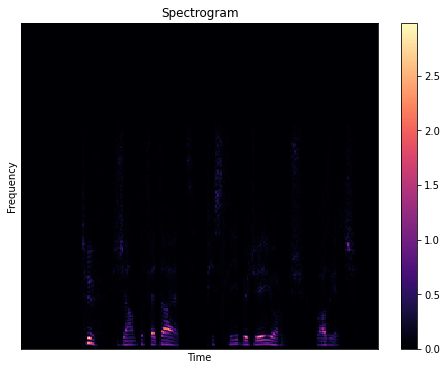

In [ ]:
# display spectrogram
plt.figure(figsize=(8,6))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Yukarıdaki grafiği incelemek biraz zor fakat yinede düşük frekans değerlerinde belirli yoğunluklar görebiliyoruz. Daha anlaşılır bır grafik için amplitude değerlerini db değerlerine çeviricez. Bunuda logaritma alarak yapıyoruz.

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

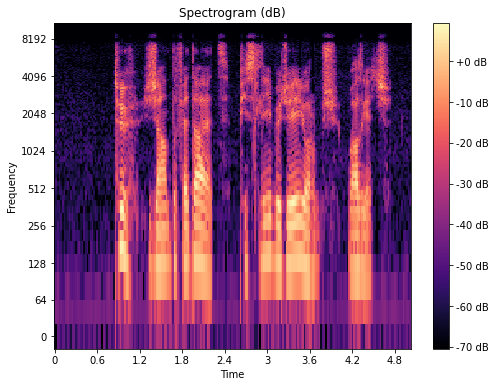

In [ ]:
plt.figure(figsize=(8,6))
img=librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, y_axis='log', x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.savefig('spectrogram_image_example.png')
plt.ylabel("Frequency")
plt.title("Spectrogram (dB)")

# MEL-SPECTROGRAM ÖZELLİĞİNİ KAYDET

In [ ]:
print("Hop Length:",hop_length)
print("The Number Of Fourier Transform:",n_fft)
log_spectrogram.shape

Hop Length: 512
The Number Of Fourier Transform: 512


(257, 302)

In [ ]:
# For plotting headlessly
def save_log_spectrogram(path,log_spectrogram):
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(log_spectrogram, ax=ax)
    fig.savefig(path)
image_path = 'spectrogram_image_example.png'
save_log_spectrogram(image_path,log_spectrogram)

In [ ]:
arr = plt.imread(image_path)
arr.shape

(288, 432, 4)

In [ ]:
def get_log_spectrogram(audio_file):
    data,sample_rate=librosa.load(AUDIO_FILE_PATH)
    stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    log_spectrogram = tf.expand_dims(log_spectrogram, axis=2)
    return log_spectrogram

In [ ]:
#This function will save all the users' spectrogram by using folders
x = []
y = []

def save_all_spectrograms():
    
    PATH = r'data\\people\\'
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(PATH)):

        for f in filenames:
            # load audio file
            file_path = os.path.join(dirpath, f)
            log_spectrogram = get_log_spectrogram(file_path)
            x.append(log_spectrogram)
            person_name = str(file_path).split('\\')[-2]
            print(person_name)
            y.append(i-1)
            #if not os.path.exists('data\\spectrogram\\'+person_name):
                #os.makedirs('data\\spectrogram\\'+person_name)
            
            #file_path = 'data\\spectrogram\\'+person_name+"\\"+f
            #file_path = file_path.split('.')[0]+".png"
            #print(file_path)
            #if not os.path.exists(file_path):
                #save_log_spectrogram(file_path,log_spectrogram)
            
            #arr = plt.imread(file_path)
            #print(arr.shape)
save_all_spectrograms()

faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
faruk
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Osman
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Selim
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
Tugce
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat
TugcePolat


In [ ]:
x = np.asarray(x)
x.shape

(143, 257, 302, 1)

In [ ]:
y = np.asarray(y)
y.shape

(143,)

In [ ]:
x = np.asarray(x).astype('float32')
y = tf.keras.utils.to_categorical(y)

In [ ]:
np.save("spectrogram.npy",x)
np.save("people_name.npy",y)

In [ ]:
x = np.load("spectrogram.npy")
x.shape

(143, 257, 302, 1)

In [ ]:
y = np.load("people_name.npy")
y.shape

(143, 5)

# MFCC ÖZELLİĞİNİ KAYDET

In [ ]:
# MFCCs
# 13 MFCC özelliği ses tanıma için yeterli olacaktır.
librosa_audio_data,librosa_sample_rate=librosa.load(AUDIO_FILE_PATH)
data = librosa_audio_data
MFCCs = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
MFCCs.shape

In [ ]:
# Constant değerleri tanımla
DATASET_PATH = r"data\\augmentpeople\\"
JSON_PATH = "data_voices_augmented.json"
SAMPLE_RATE = 22050

In [ ]:
def get_wav_file_duration_in_seconds(file_path):
    audio = AudioSegment.from_file(file_path)
    audio.duration_seconds == (len(audio) / 1000.0)
    print("{} audio file is {} seconds".format(file_path,audio.duration_seconds))
    return audio.duration_seconds

In [ ]:
def create_mfcc(data_path, json_path,num_mfcc=20, n_fft=2048, hop_length=512, num_segments=5):
    """
    Bu fonksiyon muzik verisetinden MFCC özelliklerini çıkarır ve json dosyasına kaydeder.
    Json dosyasında konuşan kişinin ismi, etiketi ve sesin mfcc değerleri yer alır.
    
    
    
    """
    
    
    # MFCC etiket ve insan isimlerini içeren bir dictionary
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    SAMPLE_RATE = 22050
    TRACK_DURATION = 30 # measured in seconds
    SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_path)):
        # people klasörünün altındaki kişilerin klasör isimlerini almayı sağlar.
        #person_name = str(dirnames).split('\\')[2]
        #data["mapping"].append(person_name)
        if dirpath is not data_path:
            semantic_label = dirpath.split("\\")[4]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))  
            
            for f in filenames:

                file_path = os.path.join(dirpath, f)

                if file_path.endswith('.wav'):
                    print(file_path)
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))
                            
            
    return data

In [ ]:
"MFCC değerlerini bir json dosyasına yazdır"
# Constant değerleri tanımla
DATASET_PATH = r"data\\augmentpeople\\"
JSON_PATH = "data_voices_augmented.json"
SAMPLE_RATE = 22050
data = create_mfcc(DATASET_PATH, JSON_PATH)
with open(JSON_PATH, "w") as fp:
    json.dump(data, fp, indent=4)


Processing: osman
data\\augmentpeople\\osman\osman0.wav
data\\augmentpeople\\osman\osman0.wav, segment:1
data\\augmentpeople\\osman\osman0.wav, segment:2
data\\augmentpeople\\osman\osman0.wav, segment:3
data\\augmentpeople\\osman\osman0.wav, segment:4
data\\augmentpeople\\osman\osman0.wav, segment:5
data\\augmentpeople\\osman\osman1.wav
data\\augmentpeople\\osman\osman1.wav, segment:1
data\\augmentpeople\\osman\osman1.wav, segment:2
data\\augmentpeople\\osman\osman1.wav, segment:3
data\\augmentpeople\\osman\osman1.wav, segment:4
data\\augmentpeople\\osman\osman1.wav, segment:5
data\\augmentpeople\\osman\osman10.wav
data\\augmentpeople\\osman\osman10.wav, segment:1
data\\augmentpeople\\osman\osman10.wav, segment:2
data\\augmentpeople\\osman\osman10.wav, segment:3
data\\augmentpeople\\osman\osman10.wav, segment:4
data\\augmentpeople\\osman\osman10.wav, segment:5
data\\augmentpeople\\osman\osman11.wav
data\\augmentpeople\\osman\osman11.wav, segment:1
data\\augmentpeople\\osman\osman11.wa

data\\augmentpeople\\osman\osman34.wav, segment:5
data\\augmentpeople\\osman\osman35.wav
data\\augmentpeople\\osman\osman35.wav, segment:1
data\\augmentpeople\\osman\osman35.wav, segment:2
data\\augmentpeople\\osman\osman35.wav, segment:3
data\\augmentpeople\\osman\osman35.wav, segment:4
data\\augmentpeople\\osman\osman35.wav, segment:5
data\\augmentpeople\\osman\osman36.wav
data\\augmentpeople\\osman\osman36.wav, segment:1
data\\augmentpeople\\osman\osman36.wav, segment:2
data\\augmentpeople\\osman\osman36.wav, segment:3
data\\augmentpeople\\osman\osman36.wav, segment:4
data\\augmentpeople\\osman\osman36.wav, segment:5
data\\augmentpeople\\osman\osman37.wav
data\\augmentpeople\\osman\osman37.wav, segment:1
data\\augmentpeople\\osman\osman37.wav, segment:2
data\\augmentpeople\\osman\osman37.wav, segment:3
data\\augmentpeople\\osman\osman37.wav, segment:4
data\\augmentpeople\\osman\osman37.wav, segment:5
data\\augmentpeople\\osman\osman38.wav
data\\augmentpeople\\osman\osman38.wav, segm

data\\augmentpeople\\osman\osman7.wav, segment:5
data\\augmentpeople\\osman\osman8.wav
data\\augmentpeople\\osman\osman8.wav, segment:1
data\\augmentpeople\\osman\osman8.wav, segment:2
data\\augmentpeople\\osman\osman8.wav, segment:3
data\\augmentpeople\\osman\osman8.wav, segment:4
data\\augmentpeople\\osman\osman8.wav, segment:5
data\\augmentpeople\\osman\osman9.wav
data\\augmentpeople\\osman\osman9.wav, segment:1
data\\augmentpeople\\osman\osman9.wav, segment:2
data\\augmentpeople\\osman\osman9.wav, segment:3
data\\augmentpeople\\osman\osman9.wav, segment:4
data\\augmentpeople\\osman\osman9.wav, segment:5

Processing: selim
data\\augmentpeople\\selim\selim0.wav
data\\augmentpeople\\selim\selim0.wav, segment:1
data\\augmentpeople\\selim\selim0.wav, segment:2
data\\augmentpeople\\selim\selim0.wav, segment:3
data\\augmentpeople\\selim\selim0.wav, segment:4
data\\augmentpeople\\selim\selim0.wav, segment:5
data\\augmentpeople\\selim\selim1.wav
data\\augmentpeople\\selim\selim1.wav, segmen

data\\augmentpeople\\selim\selim32.wav, segment:5
data\\augmentpeople\\selim\selim33.wav
data\\augmentpeople\\selim\selim33.wav, segment:1
data\\augmentpeople\\selim\selim33.wav, segment:2
data\\augmentpeople\\selim\selim33.wav, segment:3
data\\augmentpeople\\selim\selim33.wav, segment:4
data\\augmentpeople\\selim\selim33.wav, segment:5
data\\augmentpeople\\selim\selim34.wav
data\\augmentpeople\\selim\selim34.wav, segment:1
data\\augmentpeople\\selim\selim34.wav, segment:2
data\\augmentpeople\\selim\selim34.wav, segment:3
data\\augmentpeople\\selim\selim34.wav, segment:4
data\\augmentpeople\\selim\selim34.wav, segment:5
data\\augmentpeople\\selim\selim35.wav
data\\augmentpeople\\selim\selim35.wav, segment:1
data\\augmentpeople\\selim\selim35.wav, segment:2
data\\augmentpeople\\selim\selim35.wav, segment:3
data\\augmentpeople\\selim\selim35.wav, segment:4
data\\augmentpeople\\selim\selim35.wav, segment:5
data\\augmentpeople\\selim\selim36.wav
data\\augmentpeople\\selim\selim36.wav, segm

data\\augmentpeople\\selim\selim59.wav, segment:5
data\\augmentpeople\\selim\selim6.wav
data\\augmentpeople\\selim\selim6.wav, segment:1
data\\augmentpeople\\selim\selim6.wav, segment:2
data\\augmentpeople\\selim\selim6.wav, segment:3
data\\augmentpeople\\selim\selim6.wav, segment:4
data\\augmentpeople\\selim\selim6.wav, segment:5
data\\augmentpeople\\selim\selim7.wav
data\\augmentpeople\\selim\selim7.wav, segment:1
data\\augmentpeople\\selim\selim7.wav, segment:2
data\\augmentpeople\\selim\selim7.wav, segment:3
data\\augmentpeople\\selim\selim7.wav, segment:4
data\\augmentpeople\\selim\selim7.wav, segment:5
data\\augmentpeople\\selim\selim8.wav
data\\augmentpeople\\selim\selim8.wav, segment:1
data\\augmentpeople\\selim\selim8.wav, segment:2
data\\augmentpeople\\selim\selim8.wav, segment:3
data\\augmentpeople\\selim\selim8.wav, segment:4
data\\augmentpeople\\selim\selim8.wav, segment:5
data\\augmentpeople\\selim\selim9.wav
data\\augmentpeople\\selim\selim9.wav, segment:1
data\\augmentp

data\\augmentpeople\\tuğçenur\tuğçenur28.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur29.wav
data\\augmentpeople\\tuğçenur\tuğçenur29.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur29.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur29.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur29.wav, segment:4
data\\augmentpeople\\tuğçenur\tuğçenur29.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur3.wav
data\\augmentpeople\\tuğçenur\tuğçenur3.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur3.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur3.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur3.wav, segment:4
data\\augmentpeople\\tuğçenur\tuğçenur3.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur30.wav
data\\augmentpeople\\tuğçenur\tuğçenur30.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur30.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur30.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur30.wav, segment:4
data\\augmentpeople\\tuğçenur\t

data\\augmentpeople\\tuğçenur\tuğçenur51.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur51.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur51.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur51.wav, segment:4
data\\augmentpeople\\tuğçenur\tuğçenur51.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur52.wav
data\\augmentpeople\\tuğçenur\tuğçenur52.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur52.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur52.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur52.wav, segment:4
data\\augmentpeople\\tuğçenur\tuğçenur52.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur53.wav
data\\augmentpeople\\tuğçenur\tuğçenur53.wav, segment:1
data\\augmentpeople\\tuğçenur\tuğçenur53.wav, segment:2
data\\augmentpeople\\tuğçenur\tuğçenur53.wav, segment:3
data\\augmentpeople\\tuğçenur\tuğçenur53.wav, segment:4
data\\augmentpeople\\tuğçenur\tuğçenur53.wav, segment:5
data\\augmentpeople\\tuğçenur\tuğçenur54.wav
data\\augmentpeople\\tuğç

data\\augmentpeople\\tuğçepolat\tuğçepolat19.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav, segment:3
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav, segment:4
data\\augmentpeople\\tuğçepolat\tuğçepolat2.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav, segment:3
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav, segment:4
data\\augmentpeople\\tuğçepolat\tuğçepolat20.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat21.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat21.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat21.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat21.wav, segment:3
data\\augmentpeople

data\\augmentpeople\\tuğçepolat\tuğçepolat40.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav, segment:3
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav, segment:4
data\\augmentpeople\\tuğçepolat\tuğçepolat41.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav, segment:3
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav, segment:4
data\\augmentpeople\\tuğçepolat\tuğçepolat42.wav, segment:5
data\\augmentpeople\\tuğçepolat\tuğçepolat43.wav
data\\augmentpeople\\tuğçepolat\tuğçepolat43.wav, segment:1
data\\augmentpeople\\tuğçepolat\tuğçepolat43.wav, segment:2
data\\augmentpeople\\tuğçepolat\tuğçepolat43.wav, segment:3
data\\augment

data\\augmentpeople\\tuğçepolat\tuğçepolat9.wav, segment:5


### !! MFCC özellikleri bir dosyaya yazıldıktan sonra "diğer" notebooktan bu veriler ile model oluşturup eğitim aşamaları yapılacaktır.

In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = r"data_voices1.json"

with open(DATA_PATH, "r") as fp:
        data = json.load(fp)

# convert lists to numpy arrays
X = np.array(data["mfcc"],dtype=object)
y = np.array(data["labels"])


print("Data succesfully loaded!")
print("Shape of input:")
print(X.shape)

Data succesfully loaded!
Shape of input:
(120, 26, 20)
